In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_name_d6 = "result_d6.csv"
file_name_d8 = "result_d8.csv"
file_name_d10 = "result_d10.csv"
file_name_d12 = "result_d12.csv"
file_name_d15 = "result_d15.csv"

In [3]:
# Load CSV file as pandas DataFrame
df6 = pd.read_csv(file_name_d6)
df8 = pd.read_csv(file_name_d8)
df10 = pd.read_csv(file_name_d10)
df12 = pd.read_csv(file_name_d12)
df15 = pd.read_csv(file_name_d15)

# frames = [df1, df_200]
# df = pd.concat(frames)

In [4]:
df8

,FD graph,TPR Sensitivity,TNR Specificity,PPV Precision,NPV Negative Precision
0,../../../jpg_file/Sparse/FR/n=200d=8.jpg,0.600000,0.615385,0.456522,0.740741
1,../../../jpg_file/Sparse/KK/n=200d=8.jpg,0.569767,0.622807,0.532609,0.657407
2,../../../jpg_file/Sparse/FA2/n=200d=8.jpg,0.500000,0.666667,0.826087,0.296296
3,../../../jpg_file/Sparse/JIGGLE/n=200d=8.jpg,0.487805,0.666667,0.869565,0.222222
4,../../../jpg_file/Sparse/FR/n=500d=8_38402.jpg,0.562654,0.602151,0.860902,0.239316
5,../../../jpg_file/Sparse/KK/n=500d=8_28738.jpg,0.544474,0.503876,0.759398,0.277778
6,../../../jpg_file/Sparse/FA2/n=500d=8_35153.jpg,0.560570,0.620253,0.887218,0.209402
7,../../../jpg_file/Sparse/JIGGLE/n=500d=8_35845...,0.572464,0.662791,0.890977,0.243590
8,../../../jpg_file/Sparse/FR/n=1000d=8_9856.jpg,0.519656,0.483871,0.815029,0.187110
9,../../../jpg_file/Sparse/KK/n=1000d=8_4794.jpg,0.553130,0.555911,0.732177,0.361746


In [5]:
def df_split(df):
    df_result = pd.DataFrame(columns=['Type', 'FD_Algorithm', 'Nodes_Number', 'Degree', 'TPR_Sensitivity', 'TNR_Specificity','PPV_Precision', 'NPV_Negative_Precision'])
    for filename in df['FD graph']:
        new_name = filename.replace("../../../jpg_file/","")
        name_list = new_name.split('/')
        prop_list = name_list[2].split('=')
        node_number = prop_list[1].replace('d','')
        if "_" in prop_list[2]:
            degree = prop_list[2].split("_")[0]
        else:
            degree = prop_list[2].replace(".jpg","")
        tpr = df.loc[df['FD graph'] == filename, 'TPR Sensitivity'].values[0]
        tnr = df.loc[df['FD graph'] == filename, 'TNR Specificity'].values[0]
        ppv = df.loc[df['FD graph'] == filename, 'PPV Precision'].values[0]
        npv = df.loc[df['FD graph'] == filename, 'NPV Negative Precision'].values[0]
        df_result.loc[len(df_result.index)] = [name_list[0], name_list[1], node_number, degree, tpr, tnr, ppv, npv]
    return df_result



In [6]:
df6_splited = df_split(df6)
df8_splited = df_split(df8)
df10_splited = df_split(df10)
df12_splited = df_split(df12)
df15_splited = df_split(df15)

In [9]:
def drawSensitivityGraphWithSameDegree(_type, _degree, df_result):
    temp = df_result.loc\
            [(df_result['Degree'] == str(_degree)), \
             ['Type', 'FD_Algorithm', 'Nodes_Number', 'TPR_Sensitivity']]
    print(temp)
    nodes_number_list = [200, 500, 1000, 2000, 3000]
    fr_list = []
    fa2_list = []
    kk_list = []
    jiggle_list = []
    for num in nodes_number_list:
        fr_list.append(temp.loc[(temp['Nodes_Number'] == str(num)) & (temp['Type'] == _type) & (temp['FD_Algorithm'] == 'FR'), 'TPR_Sensitivity'].values[0])
        fa2_list.append(temp.loc[(temp['Nodes_Number'] == str(num)) & (temp['Type'] == _type) & (temp['FD_Algorithm'] == 'FA2'), 'TPR_Sensitivity'].values[0])
        kk_list.append(temp.loc[(temp['Nodes_Number'] == str(num)) & (temp['Type'] == _type) & (temp['FD_Algorithm'] == 'KK'), 'TPR_Sensitivity'].values[0])
        jiggle_list.append(temp.loc[(temp['Nodes_Number'] == str(num)) & (temp['Type'] == _type) & (temp['FD_Algorithm'] == 'JIGGLE'), 'TPR_Sensitivity'].values[0])
        
    y1 = fr_list
    y2 = fa2_list
    y3 = kk_list
    y4 = jiggle_list
    # Plot the curves
    plt.plot(nodes_number_list, y1, label='FR')
    plt.plot(nodes_number_list, y2, label='FA2')
    plt.plot(nodes_number_list, y3, label='KK')
    plt.plot(nodes_number_list, y4, label='JIGGLE')
    plt.xticks(nodes_number_list)
    # Add a title and legend
    plt.title('Type=' + str(_type) + ' D=' + str(_degree))
    plt.legend()
    fname = "Type="+_type+"_d="+str(_degree)+"_Sensitivity.pdf"

    plt.savefig(os.path.join("graphs",fname),bbox_inches ="tight") 
    # Show the chart
    plt.show()

      Type FD_Algorithm Nodes_Number  TPR_Sensitivity
0   Sparse           FR          200         0.760417
1   Sparse           KK          200         0.755556
2   Sparse          FA2          200         0.666667
3   Sparse       JIGGLE          200         0.674157
4   Sparse           FR          500         0.685268
5   Sparse           KK          500         0.702765
6   Sparse          FA2          500         0.714912
7   Sparse       JIGGLE          500         0.710870
8   Sparse           FR         1000         0.697259
9   Sparse           KK         1000         0.686603
10  Sparse          FA2         1000         0.698570
11  Sparse       JIGGLE         1000         0.706383
12  Sparse           FR         2000         0.689528
13  Sparse           KK         2000         0.711586
14  Sparse          FA2         2000         0.700668
15  Sparse       JIGGLE         2000         0.699380
16  Sparse           FR         3000         0.710029
17  Sparse           KK     

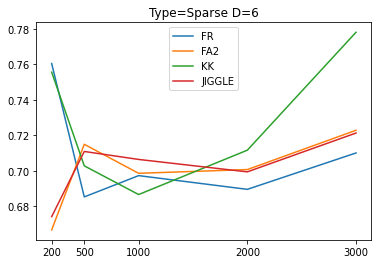

      Type FD_Algorithm Nodes_Number  TPR_Sensitivity
0   Sparse           FR          200         0.600000
1   Sparse           KK          200         0.569767
2   Sparse          FA2          200         0.500000
3   Sparse       JIGGLE          200         0.487805
4   Sparse           FR          500         0.562654
5   Sparse           KK          500         0.544474
6   Sparse          FA2          500         0.560570
7   Sparse       JIGGLE          500         0.572464
8   Sparse           FR         1000         0.519656
9   Sparse           KK         1000         0.553130
10  Sparse          FA2         1000         0.533969
11  Sparse       JIGGLE         1000         0.532934
12  Sparse           FR         2000         0.514921
13  Sparse           KK         2000         0.540691
14  Sparse          FA2         2000         0.531126
15  Sparse       JIGGLE         2000         0.542298
16  Sparse           FR         3000         0.536042
17  Sparse           KK     

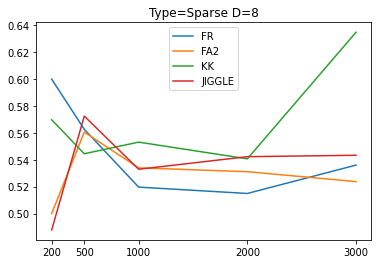

      Type FD_Algorithm Nodes_Number  TPR_Sensitivity
0   Sparse           FR          200         0.512500
1   Sparse           KK          200         0.540984
2   Sparse          FA2          200         0.381944
3   Sparse       JIGGLE          200         0.382716
4   Sparse           FR          500         0.386189
5   Sparse           KK          500         0.396450
6   Sparse          FA2          500         0.381679
7   Sparse       JIGGLE          500         0.400538
8   Sparse           FR         1000         0.384309
9   Sparse           KK         1000         0.382734
10  Sparse          FA2         1000         0.372315
11  Sparse       JIGGLE         1000         0.367816
12  Sparse           FR         2000         0.362057
13  Sparse           KK         2000         0.369037
14  Sparse          FA2         2000         0.376987
15  Sparse       JIGGLE         2000         0.356300
16  Sparse           FR         3000         0.351585
17  Sparse           KK     

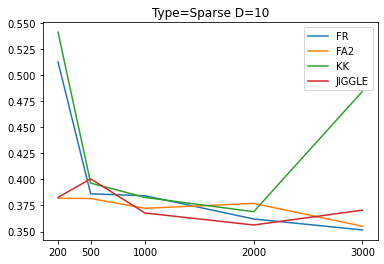

      Type FD_Algorithm Nodes_Number  TPR_Sensitivity
0   Sparse           FR          200         0.318681
1   Sparse           KK          200         0.385714
2   Sparse          FA2          200         0.300000
3   Sparse       JIGGLE          200         0.277419
4   Sparse           FR          500         0.325203
5   Sparse           KK          500         0.350000
6   Sparse          FA2          500         0.314667
7   Sparse       JIGGLE          500         0.309249
8   Sparse           FR         1000         0.254902
9   Sparse           KK         1000         0.244444
10  Sparse          FA2         1000         0.247126
11  Sparse       JIGGLE         1000         0.244186
12  Sparse           FR         2000         0.271153
13  Sparse           KK         2000         0.293310
14  Sparse          FA2         2000         0.277922
15  Sparse       JIGGLE         2000         0.272340
16  Sparse           FR         3000         0.256836
17  Sparse           KK     

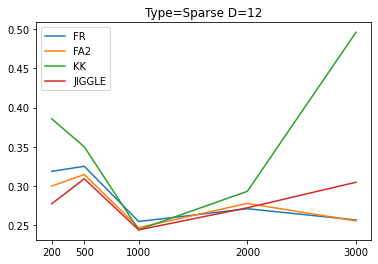

      Type FD_Algorithm Nodes_Number  TPR_Sensitivity
0   Sparse           FR          200         0.316456
1   Sparse           KK          200         0.303030
2   Sparse          FA2          200         0.226891
3   Sparse       JIGGLE          200         0.171271
4   Sparse           FR          500         0.192182
5   Sparse           KK          500         0.190141
6   Sparse          FA2          500         0.176796
7   Sparse       JIGGLE          500         0.172308
8   Sparse           FR         1000         0.226087
9   Sparse           KK         1000         0.199037
10  Sparse          FA2         1000         0.192602
11  Sparse       JIGGLE         1000         0.226331
12  Sparse           FR         2000         0.151145
13  Sparse           KK         2000         0.241379
14  Sparse          FA2         2000         0.138870
15  Sparse       JIGGLE         2000         0.163543
16  Sparse           FR         3000         0.155768
17  Sparse           KK     

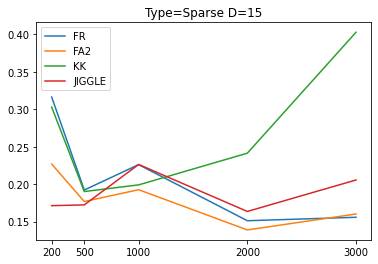

In [10]:
drawSensitivityGraphWithSameDegree('Sparse', 6, df6_splited)
drawSensitivityGraphWithSameDegree('Sparse', 8, df8_splited)
drawSensitivityGraphWithSameDegree('Sparse', 10, df10_splited)
drawSensitivityGraphWithSameDegree('Sparse', 12, df12_splited)
drawSensitivityGraphWithSameDegree('Sparse', 15, df15_splited)